In [1]:
import os
import json
import base64
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from io import BytesIO

In [2]:
# Directories for images and JSON files
OUTPUT_JSON_DIR = "output/json"
OUTPUT_IMAGE_DIR = "output/images"

# Create an ImageDataGenerator for random transformations
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate images randomly within ±15 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1, # Shift height by 10%
    shear_range=0.2,        # Apply shear transformations
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Flip images horizontally
    fill_mode="nearest"     # Fill missing pixels with nearest values
)

In [3]:
class ChessDataGenerator(tf.keras.utils.Sequence):
    """ TensorFlow Generator that loads chess images and applies transformations on the fly. """

    def __init__(self, batch_size=32):
        self.batch_size = batch_size
        self.image_filenames = sorted(os.listdir(OUTPUT_IMAGE_DIR), key=lambda x: int(x.split('.')[0]))  # Sort images by ID
        self.json_filenames = sorted(os.listdir(OUTPUT_JSON_DIR), key=lambda x: int(x.split('.')[0]))  # Sort JSONs by ID

    def __len__(self):
        return len(self.image_filenames) // self.batch_size

    def __getitem__(self, idx):
        batch_images = []
        batch_json_data = []

        # Load a batch of images and JSON metadata
        for i in range(idx * self.batch_size, (idx + 1) * self.batch_size):
            image_path = os.path.join(OUTPUT_IMAGE_DIR, self.image_filenames[i])
            json_path = os.path.join(OUTPUT_JSON_DIR, self.json_filenames[i])

            # Load and process image
            image = Image.open(image_path).convert("RGB")  # Ensure 3 channels (RGB)
            image = image.resize((224, 224))  # Resize to standard input size
            image_array = np.array(image) / 255.0  # Normalize pixel values to [0,1]

            # Apply random augmentation
            image_array = datagen.random_transform(image_array)
            batch_images.append(image_array)

            # Load JSON metadata
            with open(json_path, "r", encoding="utf-8") as json_file:
                json_data = json.load(json_file)
                batch_json_data.append(json_data)

        return np.array(batch_images), batch_json_data  # Returns (image_batch, json_batch)



Batch Shape: (16, 224, 224, 3)
Example Metadata: {'id': 0, 'State': {'Fen notation': '3qk2r/1Qp1pb1p/4N1p1/p2P1p2/1n1bn3/6P1/PP2PPBP/RNB2RK1 b - - 1 15', 'Pgn notation': '[Event "?"]\n[Site "?"]\n[Date "????.??.??"]\n[Round "?"]\n[White "?"]\n[Black "?"]\n[Result "*"]\n\n1. d4 f5 2. Nh3 g6 3. c3 Bg7 4. g3 a5 5. Bg2 d5 6. O-O Na6 7. Qb3 Nf6 8. c4 Be6 9. Qxb7 Ne4 10. Nf4 Bf7 11. Qa7 Nb4 12. Qxa8 Kd7 13. Qb7 Ke8 14. cxd5 Bxd4 15. Ne6 *'}, 'player_to_play': True, 'Best_5_moves': ['f7e6', 'e4d6', 'd4f2', 'e8d7', 'e4c5']}


In [5]:
# Create a generator instance
chess_generator = ChessDataGenerator(batch_size=16)

# Example of fetching a batch
sample_images, sample_metadata = chess_generator[0]
print("Batch Shape:", sample_images.shape)
print("Example Metadata:", sample_metadata[0])

Batch Shape: (16, 224, 224, 3)
Example Metadata: {'id': 0, 'State': {'Fen notation': '3qk2r/1Qp1pb1p/4N1p1/p2P1p2/1n1bn3/6P1/PP2PPBP/RNB2RK1 b - - 1 15', 'Pgn notation': '[Event "?"]\n[Site "?"]\n[Date "????.??.??"]\n[Round "?"]\n[White "?"]\n[Black "?"]\n[Result "*"]\n\n1. d4 f5 2. Nh3 g6 3. c3 Bg7 4. g3 a5 5. Bg2 d5 6. O-O Na6 7. Qb3 Nf6 8. c4 Be6 9. Qxb7 Ne4 10. Nf4 Bf7 11. Qa7 Nb4 12. Qxa8 Kd7 13. Qb7 Ke8 14. cxd5 Bxd4 15. Ne6 *'}, 'player_to_play': True, 'Best_5_moves': ['f7e6', 'e4d6', 'd4f2', 'e8d7', 'e4c5']}


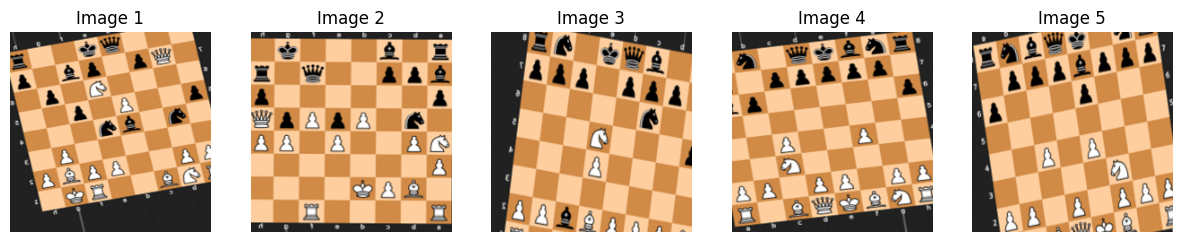

In [6]:
import matplotlib.pyplot as plt

# Display the first 5 images from the batch
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].imshow(sample_images[i])  # Show the image
    axes[i].axis("off")  # Hide axes
    axes[i].set_title(f"Image {i+1}")  # Title for clarity

plt.show()